<a href="https://colab.research.google.com/github/joshuabusinge/BananaVsCasava/blob/main/CropDetectionV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from skimage.io import imshow, imread
 from skimage.color import rgb2gray
 from skimage.filters import threshold_mean
 from skimage.morphology import closing
 from skimage.measure import label, regionprops, regionprops_table
 from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report
 from matplotlib import pyplot as plt
 import pandas as pd
 import numpy as np
 from tqdm import tqdm 
 import os

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


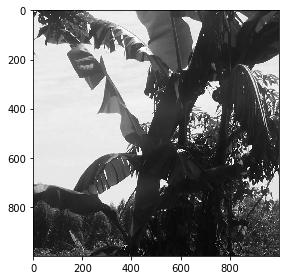

In [ ]:
 # get the filenames of the crops under the directory “Crop Detection”
 path = "/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/Crop Detection/train/"
 image_path_list = os.listdir(path)
 # looking at the first image
 i = 0
 image_path = image_path_list[i]
 image = rgb2gray(imread(path+image_path))
 imshow(image)

In [ ]:
print(f'Total {len(os.listdir(path))} images found in diretory')

Total 400 images found in diretory


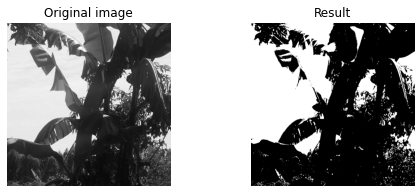

In [ ]:
thresh = threshold_mean(image)
binary = image > thresh
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')
plt.show()


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


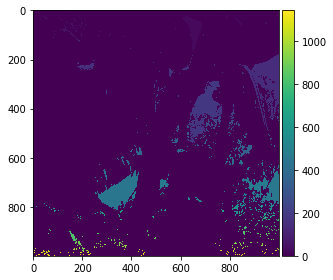

In [ ]:
label_img = label(binary)
imshow(label_img)

In [ ]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area','filled_area',
                                        'eccentricity', 'extent',                  
                                        'inertia_tensor','perimeter',
                                        'major_axis_length', 
                                        'minor_axis_length']))

table['convex_ratio'] = table['filled_area']/table['convex_area']
table['label'] = image_path[0]
table

,convex_area,filled_area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,major_axis_length,minor_axis_length,convex_ratio,label
0,449,298,0.866446,0.531194,17.654295,2.894667,2.894667,70.023963,127.053824,33.510232,16.730706,0.663697,c
1,164,99,0.930391,0.428571,30.457504,11.210591,11.210591,9.638200,64.941125,23.781054,8.717380,0.603659,c
2,24,21,0.934211,0.583333,4.848073,-0.972789,-0.972789,0.870748,17.656854,9.009553,3.213891,0.875000,c
3,2256,1456,0.949362,0.351691,472.905797,168.812742,168.812742,121.316141,310.261977,93.023466,29.226456,0.645390,c
4,17717,7109,0.935303,0.222538,2700.495086,1098.637399,1098.637399,929.501612,1465.113924,227.193832,80.392226,0.401253,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,c
1810,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,c
1811,3,3,1.000000,1.000000,0.666667,-0.000000,-0.000000,0.000000,1.000000,3.265986,0.000000,1.000000,c
1812,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,c


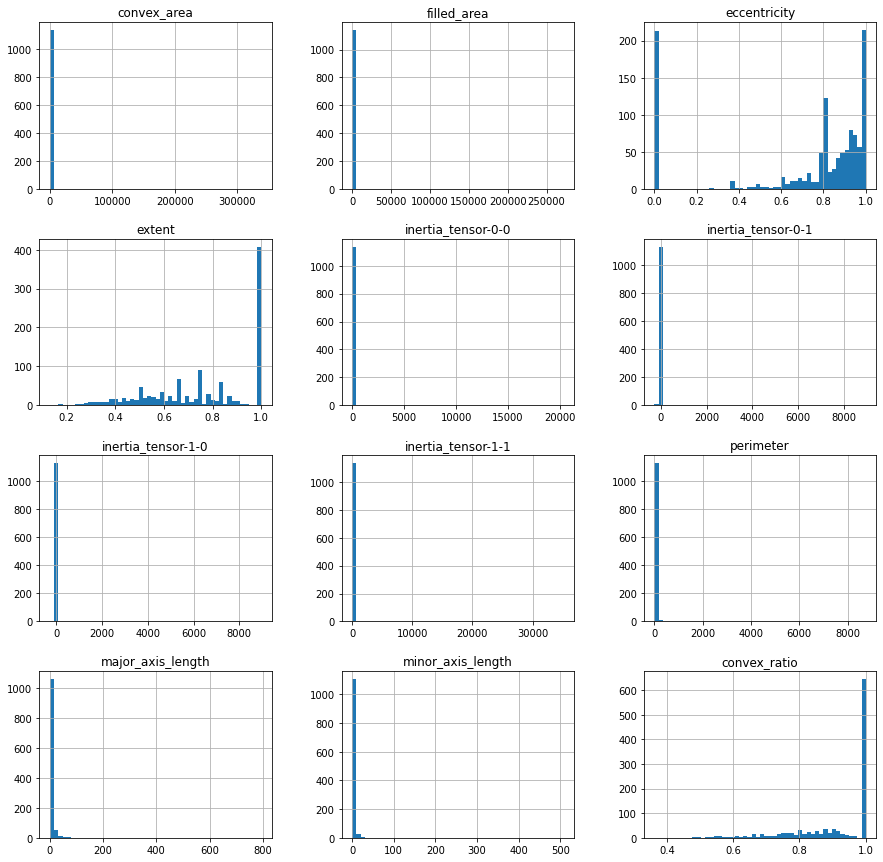

In [ ]:
# Data visualization to create histogram
table.hist(bins=50, figsize=(15, 15))
plt.show()

In [ ]:
table.dtypes

convex_area             int64
filled_area             int64
eccentricity          float64
extent                float64
inertia_tensor-0-0    float64
inertia_tensor-0-1    float64
inertia_tensor-1-0    float64
inertia_tensor-1-1    float64
perimeter             float64
major_axis_length     float64
minor_axis_length     float64
convex_ratio          float64
label                  object
dtype: object

In [ ]:
#Encoding categorical data values (
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
#print (table.iloc[:,-1])
table.iloc[:,-1]= labelencoder_Y.fit_transform(table.iloc[:,-1].values)

print(labelencoder_Y.fit_transform(table.iloc[:,-1].values))

table

[0 0 0 ... 0 0 0]


,convex_area,filled_area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,major_axis_length,minor_axis_length,convex_ratio,label
0,338719,271762,0.768553,0.648044,20334.652603,8961.869962,8961.869962,35152.241083,8752.161323,793.687396,507.789933,0.802323,0
1,27,26,0.937194,0.481481,4.309172,-2.470414,-2.470414,2.437870,20.142136,9.810349,3.421945,0.962963,0
2,5,5,0.816497,0.833333,0.560000,0.120000,0.120000,0.240000,5.207107,3.098387,1.788854,1.000000,0
3,56,43,0.859145,0.511905,9.095727,2.505679,2.505679,3.608437,31.071068,12.691873,6.494844,0.767857,0
4,346,199,0.989161,0.442222,201.395419,5.618116,5.618116,4.505997,103.041631,56.788111,8.338650,0.575145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,3,3,0.816497,0.750000,0.222222,-0.111111,-0.111111,0.222222,3.414214,2.309401,1.333333,1.000000,0
1138,2,2,1.000000,1.000000,0.250000,-0.000000,-0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0
1139,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0
1140,2,2,1.000000,1.000000,0.250000,-0.000000,-0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0


In [ ]:
image_path_list = os.listdir(path)
df = pd.DataFrame()
for i in range(len(image_path_list)):
   
  image_path = image_path_list[i]
  image = rgb2gray(imread(path+image_path))
  thresh = threshold_mean(image)
  binary = image > thresh
  binary = closing(binary)
  label_img = label(binary)
  
  table = pd.DataFrame(regionprops_table(label_img, image,
                          ['convex_area', 'filled_area', 'eccentricity',
                           'extent', 'inertia_tensor',                         
                           'major_axis_length', 'minor_axis_length',
                           'perimeter', 'solidity', 'image',
                           'orientation',
                           'equivalent_diameter',
                           'mean_intensity', 'bbox']))
  table['perimeter_area_ratio'] = table['perimeter']/table['filled_area']
  real_images = []
  std = []
  mean = []
  percent25 = []
  percent75 = []
  for prop in regionprops(label_img): 
      
      min_row, min_col, max_row, max_col = prop.bbox
      img = image[min_row:max_row,min_col:max_col]
      real_images += [img]
      mean += [np.mean(img)]
      std += [np.std(img)]
      percent25 += [np.percentile(img, 25)] 
      percent75 += [np.percentile(img, 75)]
  table['real_images'] = real_images
  table['mean_intensity'] = mean
  table['std_intensity'] = std
  table['25th Percentile'] = mean
  table['75th Percentile'] = std
  table['inter_quartile_range'] = table['75th Percentile'] - table['25th Percentile']
  table['label'] = image_path[0]
  df = pd.concat([df, table], axis=0)
df.head()

,convex_area,filled_area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,inter_quartile_range,label
0,340237,273182,0.766820,0.652749,20383.581919,8895.971219,8895.971219,35173.318477,793.439223,509.278514,...,0,750,520,0.027422,"[[0.21573098039215688, 0.1560741176470588, 0.1...",0.304951,0.661566,0.304951,-0.356615,b
1,27,26,0.937194,0.481481,4.309172,-2.470414,-2.470414,2.437870,9.810349,3.421945,...,35,6,44,0.774698,"[[0.6042945098039216, 0.6317454901960784, 0.87...",0.243022,0.416543,0.243022,-0.173521,b
2,5,5,0.816497,0.833333,0.560000,0.120000,0.120000,0.240000,3.098387,1.788854,...,122,2,125,1.041421,"[[0.4727180392156863, 0.5589925490196078, 0.45...",0.084121,0.436770,0.084121,-0.352649,b
3,56,45,0.852987,0.535714,8.723951,2.458765,2.458765,3.642469,12.470041,6.508517,...,167,7,179,0.659041,"[[0.7561494117647058, 0.4306592156862745, 0.43...",0.234178,0.494944,0.234178,-0.260766,b
4,349,201,0.989231,0.446667,202.579540,6.017995,6.017995,4.526373,56.957842,8.336599,...,658,10,703,0.512645,"[[0.42138039215686274, 0.5614180392156862, 0.6...",0.229441,0.457784,0.229441,-0.228343,b


In [ ]:
df.dtypes

convex_area               int64
filled_area               int64
eccentricity            float64
extent                  float64
inertia_tensor-0-0      float64
inertia_tensor-0-1      float64
inertia_tensor-1-0      float64
inertia_tensor-1-1      float64
major_axis_length       float64
minor_axis_length       float64
perimeter               float64
solidity                float64
image                    object
orientation             float64
equivalent_diameter     float64
mean_intensity          float64
bbox-0                    int64
bbox-1                    int64
bbox-2                    int64
bbox-3                    int64
perimeter_area_ratio    float64
real_images              object
std_intensity           float64
25th Percentile         float64
75th Percentile         float64
inter_quartile_range    float64
label                    object
dtype: object

In [ ]:
#Encoding categorical data values (
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()

df.iloc[:,-1]= labelencoder_Y.fit_transform(df.iloc[:,-1].values)

print(labelencoder_Y.fit_transform(df.iloc[:,-1].values))

df.head(20)

[0 0 0 ... 1 1 1]


,convex_area,filled_area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,inter_quartile_range,label
0,340237,273182,0.766820,0.652749,20383.581919,8895.971219,8895.971219,35173.318477,793.439223,509.278514,...,0,750,520,0.027422,"[[0.21573098039215688, 0.1560741176470588, 0.1...",0.304951,0.661566,0.304951,-0.356615,0
1,27,26,0.937194,0.481481,4.309172,-2.470414,-2.470414,2.437870,9.810349,3.421945,...,35,6,44,0.774698,"[[0.6042945098039216, 0.6317454901960784, 0.87...",0.243022,0.416543,0.243022,-0.173521,0
2,5,5,0.816497,0.833333,0.560000,0.120000,0.120000,0.240000,3.098387,1.788854,...,122,2,125,1.041421,"[[0.4727180392156863, 0.5589925490196078, 0.45...",0.084121,0.436770,0.084121,-0.352649,0
3,56,45,0.852987,0.535714,8.723951,2.458765,2.458765,3.642469,12.470041,6.508517,...,167,7,179,0.659041,"[[0.7561494117647058, 0.4306592156862745, 0.43...",0.234178,0.494944,0.234178,-0.260766,0
4,349,201,0.989231,0.446667,202.579540,6.017995,6.017995,4.526373,56.957842,8.336599,...,658,10,703,0.512645,"[[0.42138039215686274, 0.5614180392156862, 0.6...",0.229441,0.457784,0.229441,-0.228343,0
5,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,710,1,711,0.000000,[[0.4466650980392157]],0.000000,0.446665,0.000000,-0.446665,0
6,6,6,1.000000,1.000000,0.000000,-0.000000,-0.000000,2.916667,6.831301,0.000000,...,795,6,796,0.666667,"[[0.4891623529411765], [0.4813192156862745], [...",0.027114,0.458443,0.027114,-0.431329,0
7,1451,1259,0.935043,0.396910,194.240183,-138.589381,-138.589381,164.662389,71.422965,25.321951,...,814,52,875,0.150148,"[[0.6017647058823531, 0.6521796078431372, 0.69...",0.292295,0.527397,0.292295,-0.235102,0
8,28,27,0.957957,0.900000,7.196159,0.467764,0.467764,0.628258,10.754947,3.085738,...,841,3,851,0.726716,"[[0.2821376470588235, 0.4275262745098039, 0.55...",0.104729,0.511820,0.104729,-0.407091,0
9,6,6,0.790569,1.000000,0.250000,-0.000000,-0.000000,0.666667,3.265986,2.000000,...,133,8,135,1.000000,"[[0.4348941176470589, 0.4500149019607843], [0....",0.033209,0.460481,0.033209,-0.427272,0


In [ ]:
df['label'].value_counts()

1    365179
0    173297
Name: label, dtype: int64

#### Data Visulaization

Number of Banana 173297
 Cassava count: 365179


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


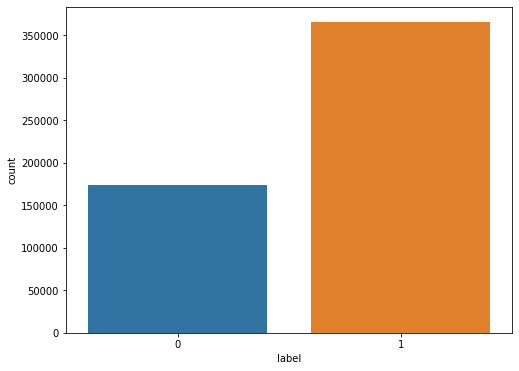

In [ ]:
import seaborn as sns
#The label column
labels_data = df['label']
# Benign and Malignant count
print("Number of Banana {banana_count}\n Cassava count: {cassava_count}" 
.format(banana_count = labels_data.value_counts()[0], cassava_count = labels_data.value_counts()[1]))

plt.figure(figsize=(8,6))
labels_count = sns.countplot(labels_data, label="Count")

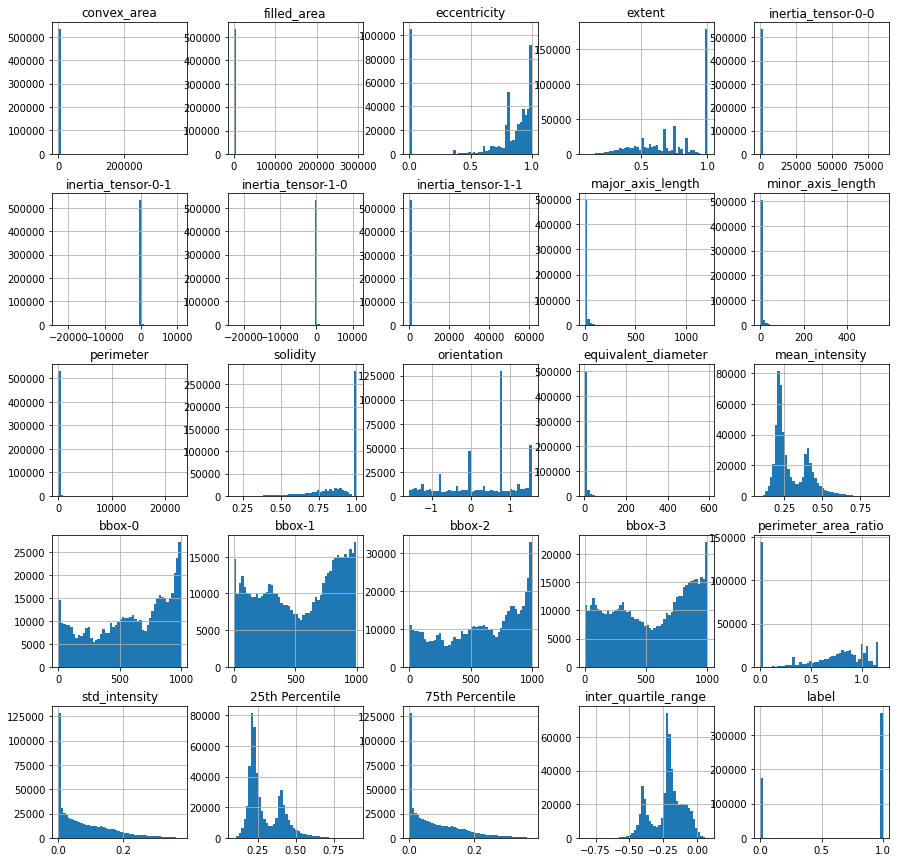

In [ ]:
# Data visualization to create histogram
df.hist(bins=50, figsize=(15, 15))
plt.show()

In [ ]:
# no of rows and columns
df.shape

(538476, 27)

In [ ]:
X = df.drop(columns=['label', 'image', 'real_images'])
#features
X = X[['inter_quartile_range','75th Percentile','bbox-0','bbox-1','bbox-2','bbox-3',
       'std_intensity','mean_intensity','25th Percentile',
       'minor_axis_length', 'solidity', 'eccentricity']]
#target
y = df['label']
columns = X.columns
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=123, stratify=y)

#### Classifier Algorithm

### Gaussian Naive Bayes

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 96.10827594916023


In [ ]:
print(f"Test Accuracy: {np.mean(gnb.predict(X_test) ==y_test)*100:.2f}%")

Test Accuracy: 96.11%


In [ ]:
print(y_pred)

[1 0 0 ... 0 1 1]


In [ ]:
#print classification report of test set
print(classification_report(gnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     45099
           1       0.96      0.98      0.97     89520

    accuracy                           0.96    134619
   macro avg       0.96      0.95      0.96    134619
weighted avg       0.96      0.96      0.96    134619



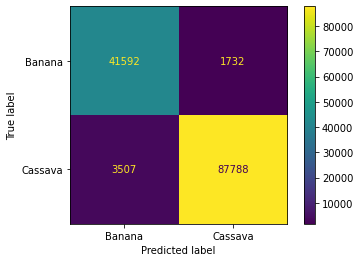

In [ ]:
#print confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_names=['Banana','Cassava']

cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

### *K*-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
#KNeighborsClassifier(...)
print(neigh.predict(X_test))

[1 0 1 ... 0 1 1]


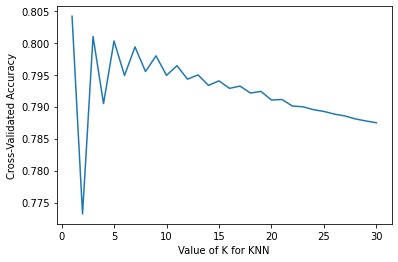

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
print(f"Test Accuracy: {np.mean(neigh.score(X_test,y_test))*100:.2f}%")

Test Accuracy: 80.95%


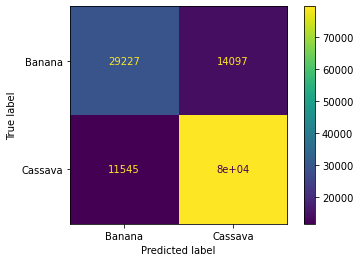

In [ ]:
cm=confusion_matrix(y_test, neigh.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

In [ ]:
print(neigh.predict_proba(X_test))

[[0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.         1.        ]
 ...
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]]


In [ ]:
#print confusion matrix of test set
print(classification_report(neigh.predict(X_test), y_test))


              precision    recall  f1-score   support

           0       0.67      0.72      0.70     40772
           1       0.87      0.85      0.86     93847

    accuracy                           0.81    134619
   macro avg       0.77      0.78      0.78    134619
weighted avg       0.81      0.81      0.81    134619

